Script for plotting the density of pixel intensities

In [1]:
#import packages
import pandas as pd
import struct
import xml.etree.ElementTree as ET
from copy import copy
from pathlib import Path
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

In [2]:
## display options
pd.set_option('display.max_columns', 500)
pd.set_option("display.max_colwidth",50)

### Load data

In [75]:
#set path for input and output
path = '.../from_ilastik/' #input
outpath = '.../Halo_intensity/merged_df_3d_background.csv' #output

In [76]:
# select search terms to identify the samples, here: 19 = 'dpy-21 (e428)' and halo = 'wild-type' 
cnds = [  '19', 'halo']

In [77]:
# find csvs that match the seach term
csv_paths = [glob(os.path.join(path,f'2*{c}*hist2.csv')) for c in cnds]

In [78]:
#overview of found data
len(csv_paths), len(csv_paths[0]), len(csv_paths[1])

(2, 31, 17)

In [79]:
#one example file
pd.read_csv(csv_paths[0][0]).tail(5)

,index,bin start,count
251,251,72574.442,0
252,252,72830.442,0
253,253,73086.442,0
254,254,73342.442,0
255,255,73598.442,0


### Get all pixel values in all csvs 
(per condition) into one list

In [80]:
dfs_temp = [pd.concat([pd.read_csv(p) for p in c_paths]) for c_paths in csv_paths]

In [81]:
len(dfs_temp), dfs_temp[0].shape, dfs_temp[1].shape

(2, (7936, 3), (4352, 3))

In [82]:
dfs_temp[0]

,index,bin start,count
0,0,8318.442,1210
1,1,8574.442,0
2,2,8830.442,1160
3,3,9086.442,190
4,4,9342.442,0
5,5,9598.442,1411
6,6,9854.442,14
7,7,10110.442,1207
8,8,10366.442,247
9,9,10622.442,1


In [83]:
vals_all_per_cnd = [list(chain(*[[v]*df["count"].tolist()[i] 
                                 for i,v in enumerate(df["index"].tolist())])) for df in dfs_temp   ]

In [84]:
len(vals_all_per_cnd)

2

In [85]:
vals_all_per_cnd

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [86]:
df_pix_vals = pd.DataFrame({f'{cnds[i]}_n{len(csv_paths[i])}':pd.Series(vals_all_per_cnd[i]) for i in range(len(cnds))})

In [87]:
df_pix_vals.head(3)

,19_n31,halo_n17
0,0,1.0
1,0,1.0
2,0,1.0


In [88]:
df_pix_vals.tail(10)

,19_n31,halo_n17
539299,89,NaN
539300,90,NaN
539301,92,NaN
539302,93,NaN
539303,93,NaN
539304,95,NaN
539305,95,NaN
539306,100,NaN
539307,102,NaN
539308,105,NaN


In [89]:
max_pix_vals = df_pix_vals.max()

In [90]:
max_pix_vals

19_n31      223.0
halo_n17    241.0
dtype: float64

In [91]:
val_count_per_series = []

for c in df_pix_vals.columns:
    
    ## Get count after dividing by number of images per condition
    ## Its a list of series:
    ## Each list item (a series) is a protein.
    ## In each series we have the pixel value as an index and the final count it should have as value
    val_count_per_series.append(df_pix_vals[c].value_counts().divide(int(c.split("_n")[1])))

In [92]:
val_count_per_series

[13     772.225806
 18     730.225806
 16     653.290323
 21     605.548387
 23     575.322581
 15     568.548387
 10     557.064516
 11     549.870968
 8      549.774194
 26     506.483871
 20     501.064516
 28     415.677419
 5      395.806452
 31     393.032258
 25     380.612903
 6      367.258065
 24     304.580645
 36     303.903226
 33     302.806452
 30     298.903226
 19     288.580645
 29     285.096774
 22     283.483871
 14     283.258065
 3      278.483871
 27     277.838710
 34     257.967742
 17     247.225806
 32     241.354839
 9      233.451613
           ...    
 153      0.161290
 166      0.129032
 179      0.129032
 177      0.129032
 175      0.129032
 167      0.129032
 170      0.129032
 162      0.129032
 157      0.129032
 145      0.129032
 164      0.129032
 155      0.096774
 168      0.096774
 160      0.096774
 183      0.096774
 180      0.096774
 181      0.064516
 190      0.064516
 187      0.064516
 186      0.064516
 165      0.064516
 178      0.

In [93]:
## Make new dataframe with the mean count of pixel values:
df_mean_count_pixval = pd.DataFrame({})

for i,c in enumerate(df_pix_vals.columns):
    series = val_count_per_series[i].astype(int).copy()
    series = series[series>0]
    #print(list(chain(*[[idx]*count for idx,count in series.items()])))
    df_mean_count_pixval[c] = pd.Series(list(chain(*[[idx]*count for idx,count in series.items()])))

In [94]:
df_mean_count_pixval.head(10)

,19_n31,halo_n17
0,13,19.0
1,13,19.0
2,13,19.0
3,13,19.0
4,13,19.0
5,13,19.0
6,13,19.0
7,13,19.0
8,13,19.0
9,13,19.0


In [97]:
#select the colors for plotting
color_dict = {
              '19_n31': "#52079C", 
              'halo_n17': "#8AB17D",
              }

In [98]:
#save to outpath
df_mean_count_pixval.to_csv(outpath, index=False) 

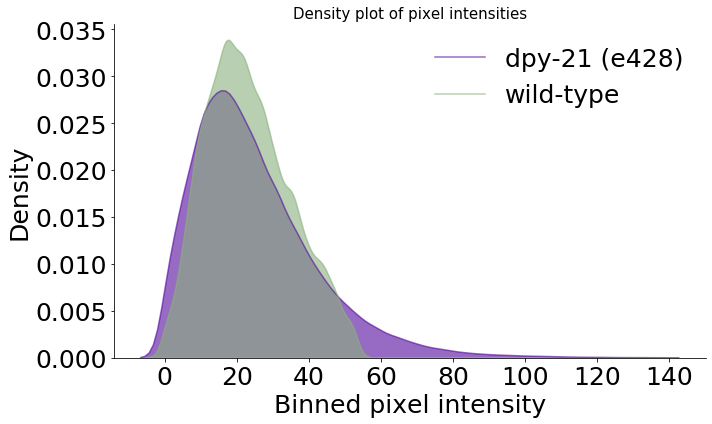

In [100]:
# plot the pixel intensities
fig, ax = plt.subplots(figsize=(10, 6))


#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for col in df_mean_count_pixval.columns:
    ax = sns.distplot(df_mean_count_pixval[col],
                      hist=False, 
                      label= col, 
                      color=color_dict[col],
                      kde_kws = {'alpha':0.6, 'shade': True} ) 
   
    
plt.legend(prop={'size': 25}, frameon=False, labels=['dpy-21 (e428)', 'wild-type'])

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#plt.yscale('log')
plt.title('Density plot of pixel intensities', fontsize=15)
plt.xlabel('Binned pixel intensity', fontsize=25)
plt.ylabel('Density', fontsize=25)
#plt.xlim(-10,60)
plt.tight_layout()
plt.savefig('Pixel_intensity_values_for_DPY-27-halo.svg', dpi=100)
plt.show()